# Image semmantic search using SBERT

- For our usecase we encode the unsplash images and then use sentence-transformers semantic search to find similar images for a given images or prompt. 

# Install and Imports

In [ ]:
!pip install -U sentence-transformers -q
!pip install gradio -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 39.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 40.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.2/14.2 MB 39.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.7/140.7 KB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 KB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 KB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 KB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 KB 12.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... d

In [ ]:
from sentence_transformers import SentenceTransformer, util
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from PIL import Image
import glob

import gradio as gr

# Data downloading



In [ ]:
!wget http://sbert.net/datasets/unsplash-25k-photos.zip -q

In [ ]:
#!unzip unsplash-25k-photos.zip -d data 

In [ ]:
# creating list of images
images = list(glob.glob('data/*.jpg'))
images= images[:1000] #its takes time to run full dataset so taking just first 1000 

In [ ]:
len(images) #number of jpg file inside list

1000

In [ ]:
import random 
random.randint(0, len(images)-1)

861

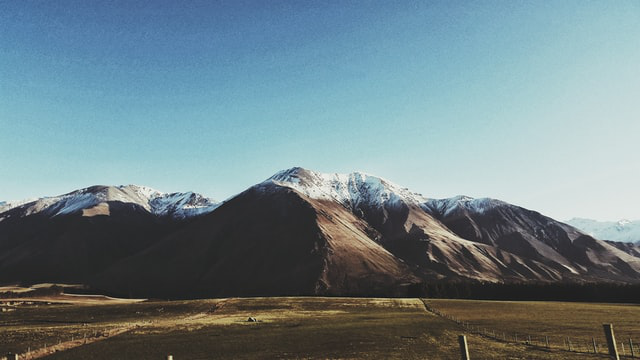

In [ ]:
#showing image randomly
Image.open(images[random.randint(0, len(images)-1)])

# Loading model

In [ ]:
#lets load the respective CLIP model
model = SentenceTransformer('clip-ViT-B-32')

In [ ]:
img_emb = model.encode([Image.open(filepath) for filepath in images],
                       batch_size=128, convert_to_tensor=True, show_progress_bar=True)

Batches:   0%|          | 0/8 [00:00<?, ?it/s]

In [ ]:
#query = 'two dogs'

#query_emb = model.encode([query], show_progress_bar=False)

In [ ]:
#util.semantic_search(query_emb, img_emb, top_k = 3)[0] 
#top 3

In [ ]:
#Image.open(images[568])

In [ ]:
# displaying image
def display_image(filepath, title = ''):
    fig = plt.figure()
    img = mpimg.imread(filepath)
    imgplot = plt.imshow(img)

    plt.title(title)
    plt.axis('off')
    plt.show()
    print()

### Search by Text

In [ ]:
# looking for image by provideing text
def search_by_text(query, k):
    print(f"Query = {query}\n") #\n:new line
    query_emb = model.encode([query], show_progress_bar=False)
    results = util.semantic_search(query_emb, img_emb, top_k=k)[0] #top k

    for res in results:
        file_name = images[res['corpus_id']]
        display_image(file_name, f"Similarity : {res['score']}") #displaying similar images

Query = two dogs



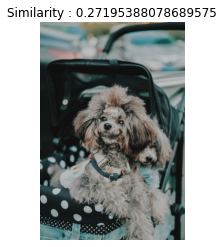

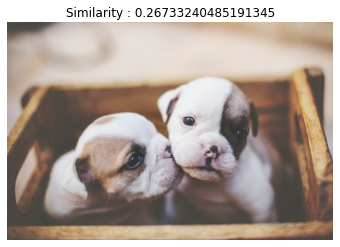

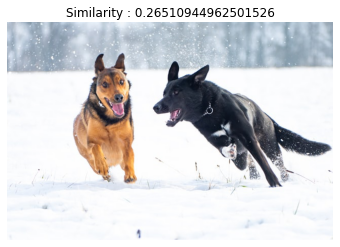

In [ ]:
search_by_text('two dogs', 3)

### Search by Images


In [ ]:
# looking into image by providing image 
def search_by_image(filepath, k):
    display_image(filepath, 'Original image')
    query_image = Image.open(filepath)
    query_emb = model.encode([query_image], show_progress_bar=False)
    results = util.semantic_search(query_emb, img_emb, top_k=k)[0] #top k

    for res in results:
        file_name = images[res['corpus_id']]
        display_image(file_name, f"Similarity : {res['score']}") #displaying similar images


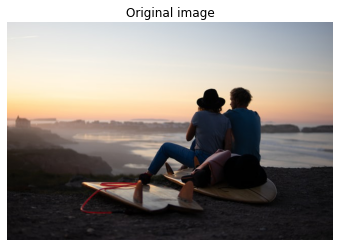

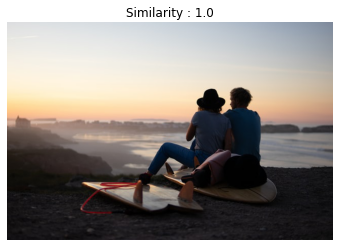

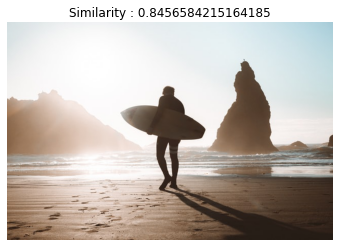

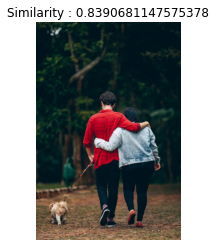

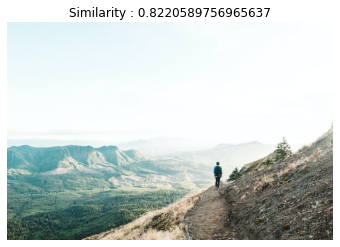

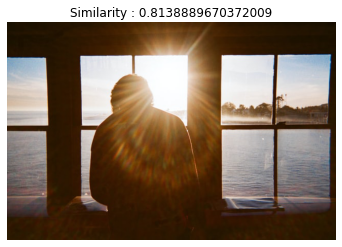

In [ ]:
search_by_image('data/df-BFy8gah0.jpg', 5)

In [ ]:
!wget -O test.jpg https://i.ibb.co/pfGRsgM/57038508-171805033811465-341578166544201906-n.jpg -q #downloading new image

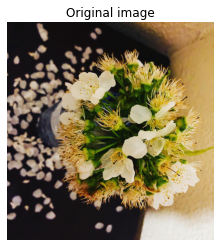

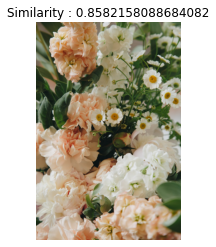

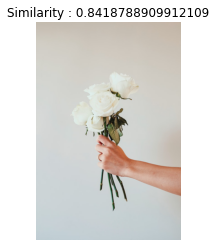

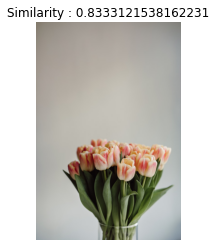

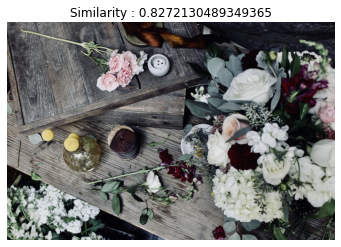

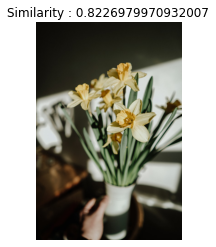

In [ ]:
search_by_image('test.jpg', 5) #providing image which is not inside the unsplash dataset 

## Gradio

In [ ]:
def gradio_search(text, k):
    query_emb = model.encode([text], show_progress_bar=False)
    results = util.semantic_search(query_emb, img_emb, top_k=k)[0]

    gallery = [(images[res['corpus_id']], res["score"]) for res in results]
    return gallery

In [ ]:

gr.Interface(fn=gradio_search, 
             inputs=['text',
                     gr.Slider(1, 10, value=3, step=1)],
             examples = [
                 ["Two dogs", None],
                 ["A person taking a picture", None],
                 ],
             outputs=[gr.Gallery()]).launch(debug=True, share=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://cce677bb-cb6f-4f75.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces
